# Simple example script illustrating object detection
This notebook is a simple example of how to use the DeGirum PySDK to do AI inference on a graphical file using an object detection model.

This script works with the following inference options:

1. Run inference on a DeGirum AI Server deployed on the local host or on some computer in your LAN or VPN
2. Run inference on a DeGirum ORCA accelerator directly installed on your computer.

Both can be used with local models or cloud models.

To try the different options, you just need to uncomment **one** of the lines in the code below.

See [here](https://docs.degirum.com/content/pysdk/ai-server-configuration/) to learn how to set up a server and a local zoo. Alternatively, for use with a cloud zoo, you need to provide a [cloud API access token](https://docs.degirum.com/content/delight/token/).

#### Specify where do you want to run your inferences

In [2]:
import degirum as dg

#
# Please adjust the following parameters to your needs
#
cloud_zoo_url = "https://cs.degirum.com/degirum/public" # Specify your cloud zoo URL here for cases 1b, 2b, and 3
cloud_token = "" # Specify your cloud token here for cases 1b, 2b, and 3
ai_server_host = "localhost" # Specify your AI server hostname here for cases 1a and 1b
local_ai_model_path = "./models/mobilenet_v2/mobilenet_v2_ssd_coco--300x300_quant_n2x_cpu_1.json" # Specify your local AI model path here for case 2a

#
# Please UNCOMMENT only ONE of the following lines to specify 
# where to run AI inference and which model zoo to use
#

# 1a. Inference on DeGirum AI Server deployed on a localhost or on some computer in your LAN or VPN,
#    with a model zoo deployed locally on that server
# zoo = dg.connect(ai_server_host)

# 1b. Inference on DeGirum AI Server deployed on a localhost or on some computer in your LAN or VPN,
#    with a public cloud model zoo.
# zoo = dg.connect(ai_server_host, cloud_zoo_url, cloud_token)

# 2a. Inference on DeGirum ORCA accelerator installed on your computer, with a local model
zoo = dg.connect(dg.LOCAL, local_ai_model_path)

# 2b. Inference on DeGirum ORCA accelerator installed on your computer, with a cloud model
# zoo = dg.connect(dg.LOCAL, cloud_zoo_url, cloud_token)

# 3. Cloud inference
# zoo = dg.connect(dg.CLOUD, cloud_zoo_url, cloud_token)

#### The rest of the cells below should run without any modifications

In [3]:
# list all AI models available for inference
zoo.list_models()

['mobilenet_v2_ssd_coco--300x300_quant_n2x_cpu_1']

In [4]:
# load AI model 'ssd_mobilenet_v2' for DeGirum NNX CPU runtime
# (change model name to "...n2x_orca1_1" to run it on DeGirum Orca AI accelerator)
model = zoo.load_model("mobilenet_v2_ssd_coco--300x300_quant_n2x_cpu_1")

In [5]:
# configure some result visualization parameters (optional step)
model.image_backend = "pil" # use PIL as image rendering backend
model.overlay_show_probabilities = True # show class probabilities on overlay image
model.overlay_font_scale = 1.5 # increase font size for overlay image labels
model.overlay_alpha = 1 # set minimum transparency for overlay image labels

In [6]:
# perform AI model inference on given image file (assuming the current directory is where this notebook is located)
res = model("./images/TwoCats.jpg")

- bbox: [226.9706243276596, 34.95021942257881, 372.1808223724365, 396.5525736808777]
  category_id: 16
  label: cat
  score: 0.8949445486068726
- bbox: [73.67298629879951, 34.00069499015808, 248.47459995746613, 347.6342500448227]
  category_id: 16
  label: cat
  score: 0.841070294380188



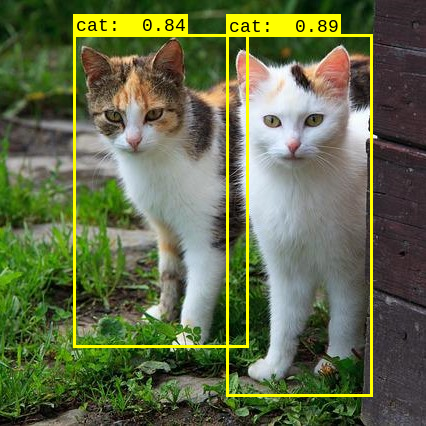

In [7]:
# show results of inference
print(res) # numeric results
res.image_overlay # graphical results